In [7]:
import tensorflow as tf
import numpy as np
import scipy
import pandas as pd
from scipy import misc
import glob
from PIL import Image
import os
import matplotlib.pyplot as plt
import librosa
import random
import shutil

In [2]:
from pydub import AudioSegment
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

In [ ]:
# create the directories for the mel spectrograms
os.makedirs('./content/spectrograms3sec')
os.makedirs('./content/spectrograms3sec/train')
os.makedirs('./content/spectrograms3sec/test')

In [6]:
# create sub folders for each genres
genres = "Folk Rock Instrumental Pop Hip-Hop Electronic International Experimental"
genres = genres.split()
for g in genres:
    path_audio = os.path.join('./content/audio3sec',f'{g}')
    os.makedirs(path_audio)
    path_train = os.path.join('./content/spectrograms3sec/train',f'{g}')
    path_test = os.path.join('./content/spectrograms3sec/test',f'{g}')
    os.makedirs(path_train)
    os.makedirs(path_test)

In [4]:
df = pd.read_csv('track_features_final.csv', index_col=0)

In [12]:
df.shape

(3284, 12)

In [8]:
# Some files are corrupted at source. They need to be removed
remove = [98565, 98567, 98569, 99134, 108925, 133297]

In [13]:
df = df[df['track_id'].isin(remove)==False]

In [14]:
# Segment the audio files into shorter clips.
# We have used 100 audio files from each genre
i = 0
for g in genres:
    j=0
    print(f"{g}")
    genre_files = df[df['genre']==g]['track_id'].values
    files = genre_files[np.random.randint(genre_files.shape[0], size=100)]
    for file in files:
        filename = str(file).rjust(6, '0') + '.mp3'
        song  =  os.path.join(f'./fma_small/{filename[:3]}/',f'{filename}')
        j = j+1
        for w in range(0,6):
            i = i+1
            #print(i)
            t1 = 5*(w)*1000
            t2 = 5*(w+1)*1000
            newAudio = AudioSegment.from_mp3(song)
            new = newAudio[t1:t2]
            new.export(f'./content/audio3sec/{g}/{str(file)+"_"+str(w)}.mp3', format="mp3")

Folk
Rock
Instrumental
Pop
Hip-Hop
Electronic
International
Experimental


In [ ]:
# create mel spectrograms for each clip
for g in genres:
    j = 0
    print(g)
    for filename in os.listdir(os.path.join('./content/audio3sec',f"{g}")):
        song  =  os.path.join(f'./content/audio3sec/{g}',f'{filename}')
        j = j+1

        y,sr = librosa.load(song,duration=5)
        #print(sr)
        mels = librosa.feature.melspectrogram(y=y,sr=sr)
        fig = plt.Figure()
        canvas = FigureCanvas(fig)
        p = plt.imshow(librosa.power_to_db(mels,ref=np.max))
        plt.axis('off')
        plt.savefig(f'./content/spectrograms3sec/train/{g}/{filename[:-4]}.png')

Folk


C:\Users\vijal\.conda\envs\dfpy\lib\site-packages\librosa\core\audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
C:\Users\vijal\.conda\envs\dfpy\lib\site-packages\librosa\core\audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Rock
Instrumental
Pop


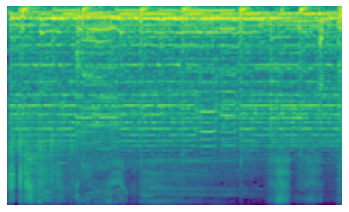

In [63]:
p = plt.imshow(librosa.power_to_db(mels,ref=np.max))
plt.axis('off')
plt.savefig(f'./{g+str(j)}.png')